In [101]:
import os
import pickle
import numpy as np

In [102]:
#load log資料夾中的一個pickle檔
#"../log/ml_EASY_1_2021-03-17_13-43-40.pickle"
with open("/Users/peggy/Documents/109-2(2-2)/Intro to ML & its appl to gaming/MLGame/games/arkanoid/log/ml_EASY_1_2021-03-23_14-35-08.pickle", "rb") as file:
    data = pickle.load(file)
print(data)

{'record_format_version': 2, 'ml': {'scene_info': [{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (86, 388), 'platform': (70, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 3, 'status': 'GAME_ALIVE', 'ball': (79, 381), 'platform': (65, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 4, 'status': 'GAME_ALIVE', 'ball': (72, 374), 'platform': (70, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 5, 'status': 'GAME_ALIVE', 'ball': (65, 367), 'platform': (65, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (13

In [103]:
#針對資料結構進行整理
game_info = data['ml']['scene_info']
game_command = data['ml']['command']
print(game_info)
print(game_command)

[{'frame': 0, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 1, 'status': 'GAME_ALIVE', 'ball': (93, 395), 'platform': (75, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 2, 'status': 'GAME_ALIVE', 'ball': (86, 388), 'platform': (70, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 3, 'status': 'GAME_ALIVE', 'ball': (79, 381), 'platform': (65, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 4, 'status': 'GAME_ALIVE', 'ball': (72, 374), 'platform': (70, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 5, 'status': 'GAME_ALIVE', 'ball': (65, 367), 'platform': (65, 400), 'bricks': [(35, 50), (60, 50), (85, 50), (110, 50), (135, 50)], 'hard_bricks': []}, {'frame': 6, 'status'

In [104]:
#找特徵
g = game_info[1]

#feature = np.array([g['ball'][0], g['ball'][1], g['platform'][0] +20 ,0,0,92])
feature = np.array([g['ball'][1], g['platform'][0] +20 , 0, 0, 92]) #改這行
print(feature)

print(game_command[1])
game_command[1] = 0 #game_command[1]=0

[395  95   0   0 100]
MOVE_LEFT


In [105]:
#取feature
for i in range(2, len(game_info) - 1):
    g = game_info[i]
    g_last = game_info[i-1]
    des_vx = g['ball'][0] - g_last['ball'][0]
    des_vy = g['ball'][1] - g_last['ball'][1]
    if des_vy > 0:
            if des_vx > 0:
                des_x = (400 - g['ball'][1]) + g['ball'][0]
            else:
                des_x= g['ball'][0] - (400 - g['ball'][1])
    if des_vy < 0:
            des_x = 100
       
    while des_x > 200 or des_x < 0:
        if des_x > 200:
                des_x = 200 - (des_x - 200)
        else: 
                des_x = -des_x
    #feature = np.vstack(( feature,[g['ball'][0], g['ball'][1], g['platform'][0] + 20, des_vx, des_vy,des_x]))
    feature = np.vstack(( feature, [g['ball'][1], g['platform'][0] + 20, des_vx, des_vy,des_x])) #改這行
    if game_command[i] == "NONE": game_command[i] = 0
    elif game_command[i] == "MOVE_LEFT": game_command[i] = 1
    else: game_command[i] = 2 
        
answer = np.array(game_command[1:-1])
print(feature)
print(feature.shape)
print(answer)
print(answer.shape)

[[395  95   0   0 100]
 [388  90  -7  -7 100]
 [381  85  -7  -7 100]
 ...
 [ 66  85   7  -7 100]
 [ 59  80   7  -7 100]
 [ 52  85   7  -7 100]]
(484, 5)
[0 1 2 1 0 0 2 0 1 1 1 2 1 1 2 2 2 1 2 1 1 2 2 2 2 1 1 1 1 1 2 2 1 2 1 1 2
 2 2 1 2 1 0 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 1 2 2 1 2 2 0 0 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 2 2 1 2 1 1 1 2 1 2 2 1 1 2 1 1 2 2 2 1 1 1
 1 2 2 1 2 1 1 1 2 1 2 2 2 2 1 1 2 2 1 2 2 1 2 1 2 1 1 2 0 2 1 1 2 1 1 1 2
 2 2 1 2 1 1 1 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 2 2 1 1 1 2 1 2 1 2 1 2 1 2 2
 2 1 1 2 1 2 2 2 1 1 1 1 2 1 2 1 0 1 1 2 1 2 2 2 1 2 2 2 1 1 2 2 1 1 2 1 0
 1 2 1 2 1 2 2 1 2 1 1 2 1 2 2 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 2 2
 1 2 2 2 1 1 1 2 0 1 1 1 1 2 2 1 2 1 2 2 2 1 2 1 1 2 1 1 2 2 2 0 1 1 2 0 1
 2 2 1 2 2 1 2 1 1 1 2 2 1 1 2 2 1 1 2 1 2 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 2 2 1 1 2 1 1 1 1
 2 2 2 1 1 2 2 1 1 2 2

# Kmeans

In [106]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters = 3) 
kmeans.fit(feature)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

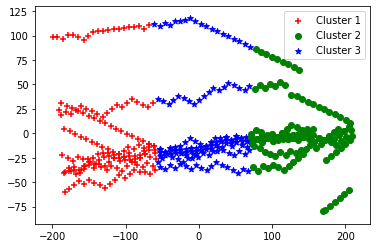

In [107]:
from matplotlib import pyplot as plt
pca = PCA(n_components=2).fit(feature)
pca_2d = pca.transform(feature)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [108]:
print(answer,"\n")
print(kmeans.labels_)

[0 1 2 1 0 0 2 0 1 1 1 2 1 1 2 2 2 1 2 1 1 2 2 2 2 1 1 1 1 1 2 2 1 2 1 1 2
 2 2 1 2 1 0 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 1 2 2 1 2 2 0 0 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 2 2 1 2 1 1 1 2 1 2 2 1 1 2 1 1 2 2 2 1 1 1
 1 2 2 1 2 1 1 1 2 1 2 2 2 2 1 1 2 2 1 2 2 1 2 1 2 1 1 2 0 2 1 1 2 1 1 1 2
 2 2 1 2 1 1 1 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 2 2 1 1 1 2 1 2 1 2 1 2 1 2 2
 2 1 1 2 1 2 2 2 1 1 1 1 2 1 2 1 0 1 1 2 1 2 2 2 1 2 2 2 1 1 2 2 1 1 2 1 0
 1 2 1 2 1 2 2 1 2 1 1 2 1 2 2 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 2 2
 1 2 2 2 1 1 1 2 0 1 1 1 1 2 2 1 2 1 2 2 2 1 2 1 1 2 1 1 2 2 2 0 1 1 2 0 1
 2 2 1 2 2 1 2 1 1 1 2 2 1 1 2 2 1 1 2 1 2 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 2 2 1 1 2 1 1 1 1
 2 2 2 1 1 2 2 1 1 2 2 2 1 1 2 1 1 1 2 2 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1
 1 2 2 1 2 1 2 1 1 1 2 1 1 2 1 1 2 2 2 2 1 2 1 1 2 1 2 1 1 2 1 2 2 2 2 1 1
 1 2 1] 

[0 0 0 0 0 0 0 

# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x = np.array(feature)
y = np.array(answer)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=9)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
predict_label = clf.predict(x_test)

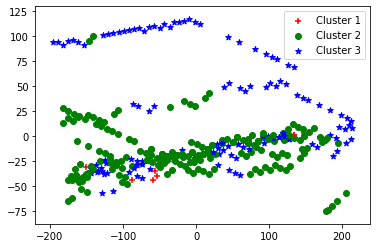

In [110]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_test)
pca_2d = pca.transform(x_test)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if predict_label[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif predict_label[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif predict_label[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()


# Actual Label

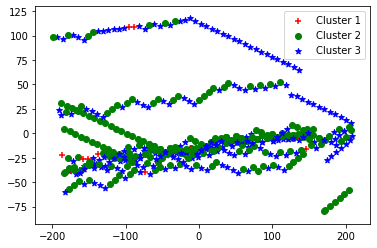

In [111]:
from matplotlib import pyplot as plt
pca = PCA(n_components=2).fit(feature)
pca_2d = pca.transform(feature)
# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if answer[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif answer[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif answer[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

In [112]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report, confusion_matrix
#資料劃分
x_train, x_test, y_train, y_test = train_test_split(feature, answer, test_size=0.3, random_state=9)
#參數區間
param_grid = {'n_neighbors':[1, 2, 3]}
#交叉驗證 
cv = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=12)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cv, verbose=10, n_jobs=-1) #n_jobs為平行運算的數量
grid.fit(x_train, y_train)
grid_predictions = grid.predict(x_test)

# #儲存
# file = open('arkanoid_e3_20210309_knn_model.pickle', 'wb')
# pickle.dump(grid, file)
# file.close()

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    1.3s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.3s finished


In [113]:
#最佳參數
print(grid.best_params_)
#預測結果
#print(grid_predictions)
#混淆矩陣
print(confusion_matrix(y_test, grid_predictions))
#分類結果
print(classification_report(y_test, grid_predictions))

{'n_neighbors': 1}
[[ 1  0  3]
 [ 1 30 31]
 [ 1 32 47]]
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.48      0.48      0.48        62
           2       0.58      0.59      0.58        80

    accuracy                           0.53       146
   macro avg       0.47      0.44      0.45       146
weighted avg       0.53      0.53      0.53       146

